### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.


The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:


#### • Which variables are important to predict the price of variable?
#### • How do these variables describe the price of the house?


### Business Goal:


You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


### Technical Requirements:


• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

## Dataset Feature Description :

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
df.head()

No. of Rows : 1168
No. of Columns : 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

## Data Integrity check

### checking for duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

### Checking for white spaces

In [8]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

### Checking for null values

In [9]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

These are the columns with null values.

In [10]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

In [11]:
df.drop(columns = ['MiscFeature','PoolQC','Alley','Fence'],axis = 1, inplace = True)
df.shape

(1168, 77)

Dropping the Columns which has more than 70% of Null Values.

### Filling the Null Values.

In [12]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [14]:
for x in ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond']:
     df[x] = df[x].fillna(df[x].mode()[0])

In [15]:
df.isnull().sum().sum()

0

Now, No null values present in our dataset.

In [16]:
# Value counts for each feature data
for i in df.columns:
    print(i,df[i].nunique())
    print('*****************')

Id 1168
*****************
MSSubClass 15
*****************
MSZoning 5
*****************
LotFrontage 106
*****************
LotArea 892
*****************
Street 2
*****************
LotShape 4
*****************
LandContour 4
*****************
Utilities 1
*****************
LotConfig 5
*****************
LandSlope 3
*****************
Neighborhood 25
*****************
Condition1 9
*****************
Condition2 8
*****************
BldgType 5
*****************
HouseStyle 8
*****************
OverallQual 10
*****************
OverallCond 9
*****************
YearBuilt 110
*****************
YearRemodAdd 61
*****************
RoofStyle 6
*****************
RoofMatl 8
*****************
Exterior1st 14
*****************
Exterior2nd 15
*****************
MasVnrType 4
*****************
MasVnrArea 284
*****************
ExterQual 4
*****************
ExterCond 5
*****************
Foundation 6
*****************
BsmtQual 4
*****************
BsmtCond 4
*****************
BsmtExposure 4
*****************
BsmtFinType1 

Utilities column has only one unique value, so dropped the column.

In [17]:
df.drop("Utilities",axis=1,inplace=True)

As column ID has no contribution in the output logically, we dropped column "ID".

In [18]:
df.drop("Id",axis=1,inplace=True)

## Statistical Matrix

In [19]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      70.807363     22.440317     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     102.310078    182.047152      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1168.0    1978.292808     24.202053   1900.0    1962.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        70.0      79.25     313.0  
LotArea          9522.5   11515.50  164660.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1972.0    2000.00    2010.0  
YearRemodAdd     1993.0    2004.00    2010.0  
MasVnrArea          0.0     160.00    1600.0  
BsmtFinSF1        385.5     714.50    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         474.0     816.00    2336.0  
TotalBsmtSF      1005.5    1291.50    6110.0  
1stFlrSF         1096.5    1392.00    4692.0  
2ndFlrSF            0.0     729.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1468.5    1795.00    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

### Observation

1. By comparing 75% and max column we can conclude that some of the feature contain outliers.

2. By looking at Mean & Median columns we can say that some of features are left skewed while others are right skewed.

3. Oldest Property is built in 1875 while recent property build in 2010.

## Feature Extraction- age from year

In [20]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [21]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [22]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

## Exploratory Data Analysis

### Zone-wise of Property Distribution

Text(0, 0.5, '')

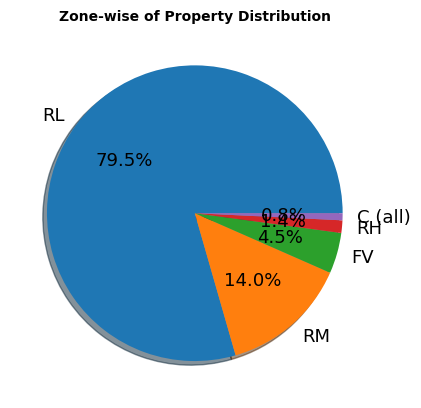

In [23]:
# Exploring MSZoning Type
ax=df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13},shadow=True)
ax.set_title('Zone-wise of Property Distribution', fontsize=10,fontweight ='bold')
ax.set_ylabel('')

#### Observations:

1. 79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium Density Residential Area.
2. Very Few property (0.8%) belongs to Commerical zone.

### Price relation with zone

Text(0, 0.5, 'Sale Price')

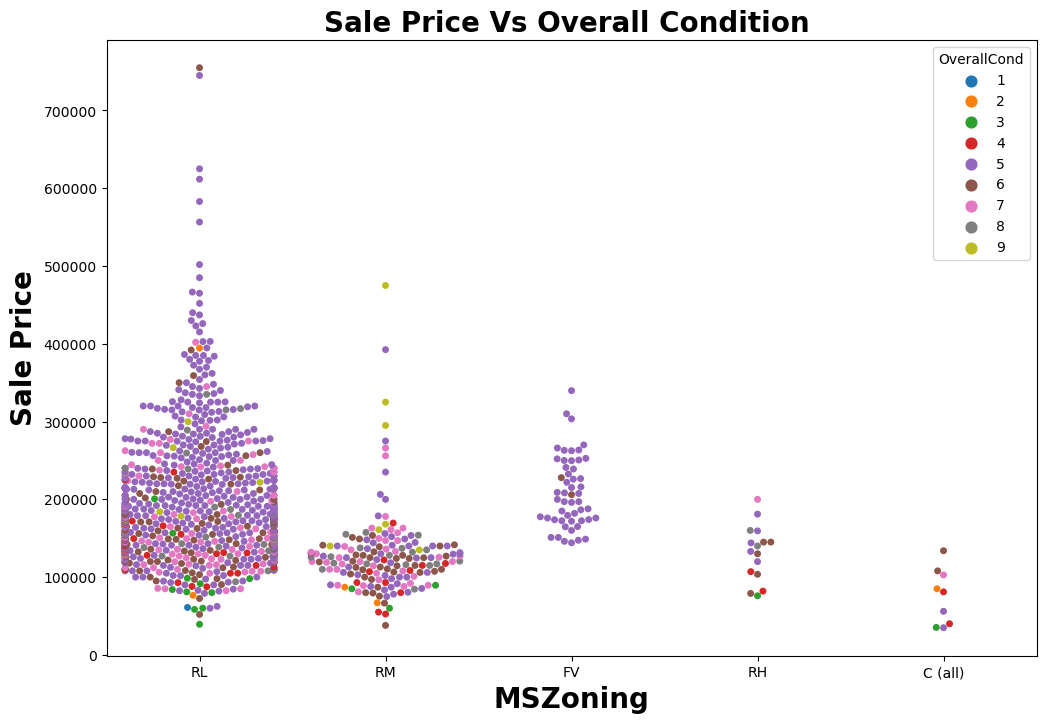

In [24]:
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue =df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')

#### Observation :

1. Most of property for sale have overall condition rating of either 5 or 6.
3. Sale Price inside RL Zone is much higher than other remaining zone.
4. Cheapest properties are available in Commerical zone.
5. Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.

### LotFrontage(Linear feet of street connected to property) realtion with sale price

Text(0, 0.5, 'SalePrice')

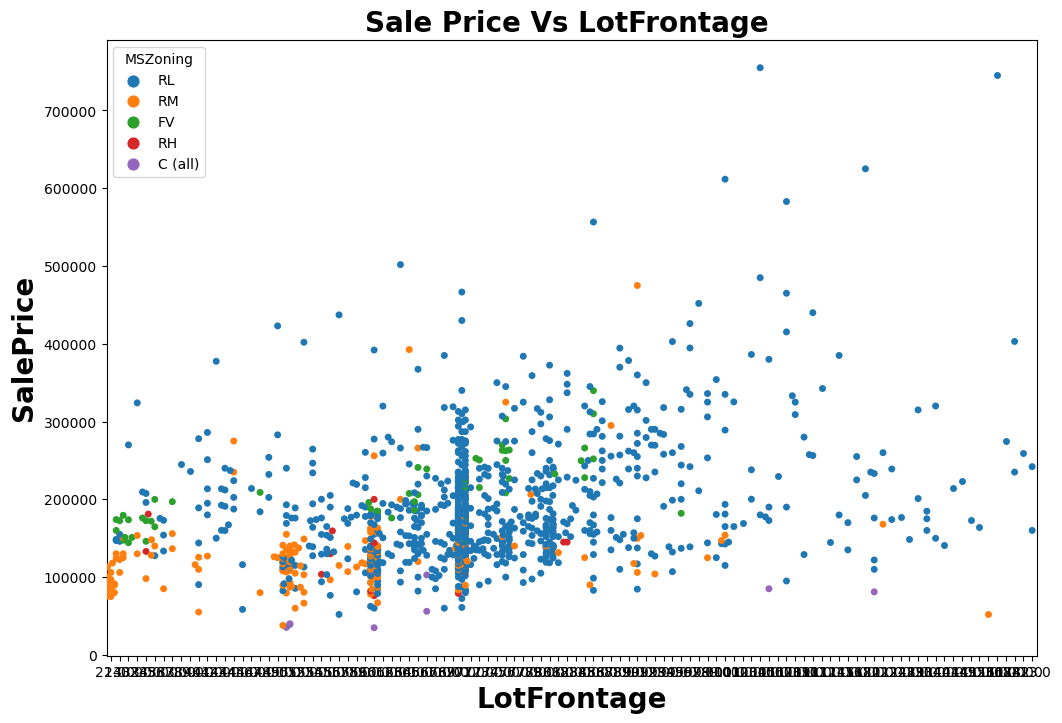

In [25]:
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')

#### Observation:


With Exception of Commerical zone, As Lot Frontage area increase (which indicate Size of street connected to property) the Sale Price increases.

### Quality & Area of house relation woth house Pricing

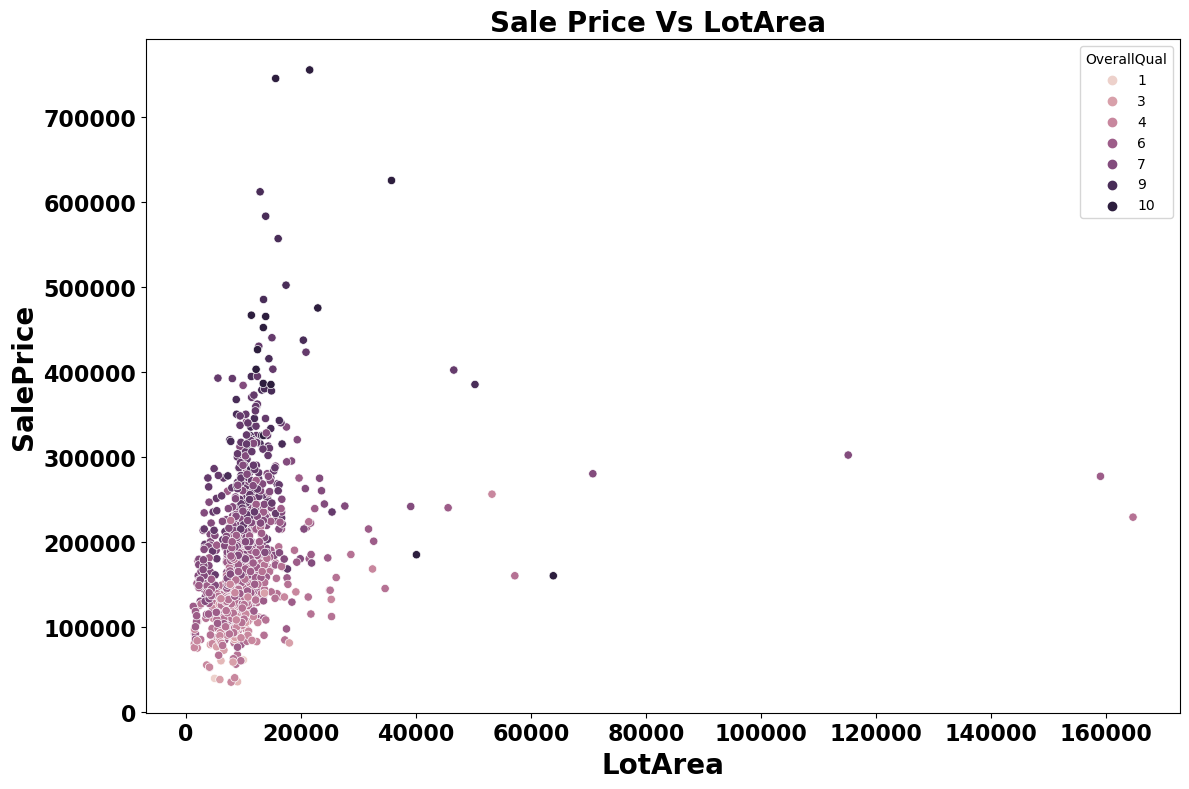

In [26]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

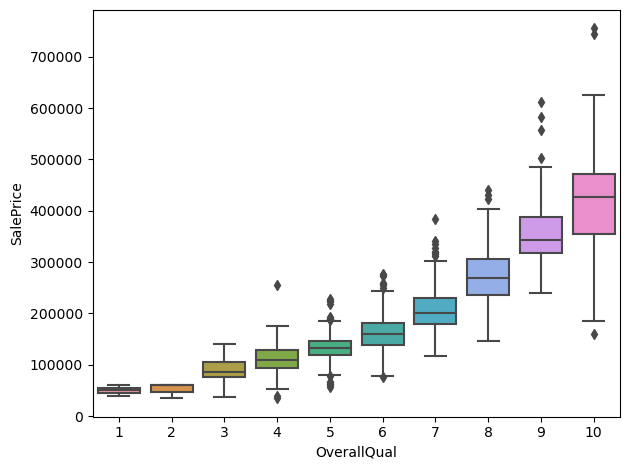

In [27]:
sns.boxplot(y = df['SalePrice'], x= df['OverallQual'])

#### Observation:


1. There is No Significant relationship found between Sale price & Lot area.
2. Most houses fall under 40000 sqft. and the price varies based on overall quality.

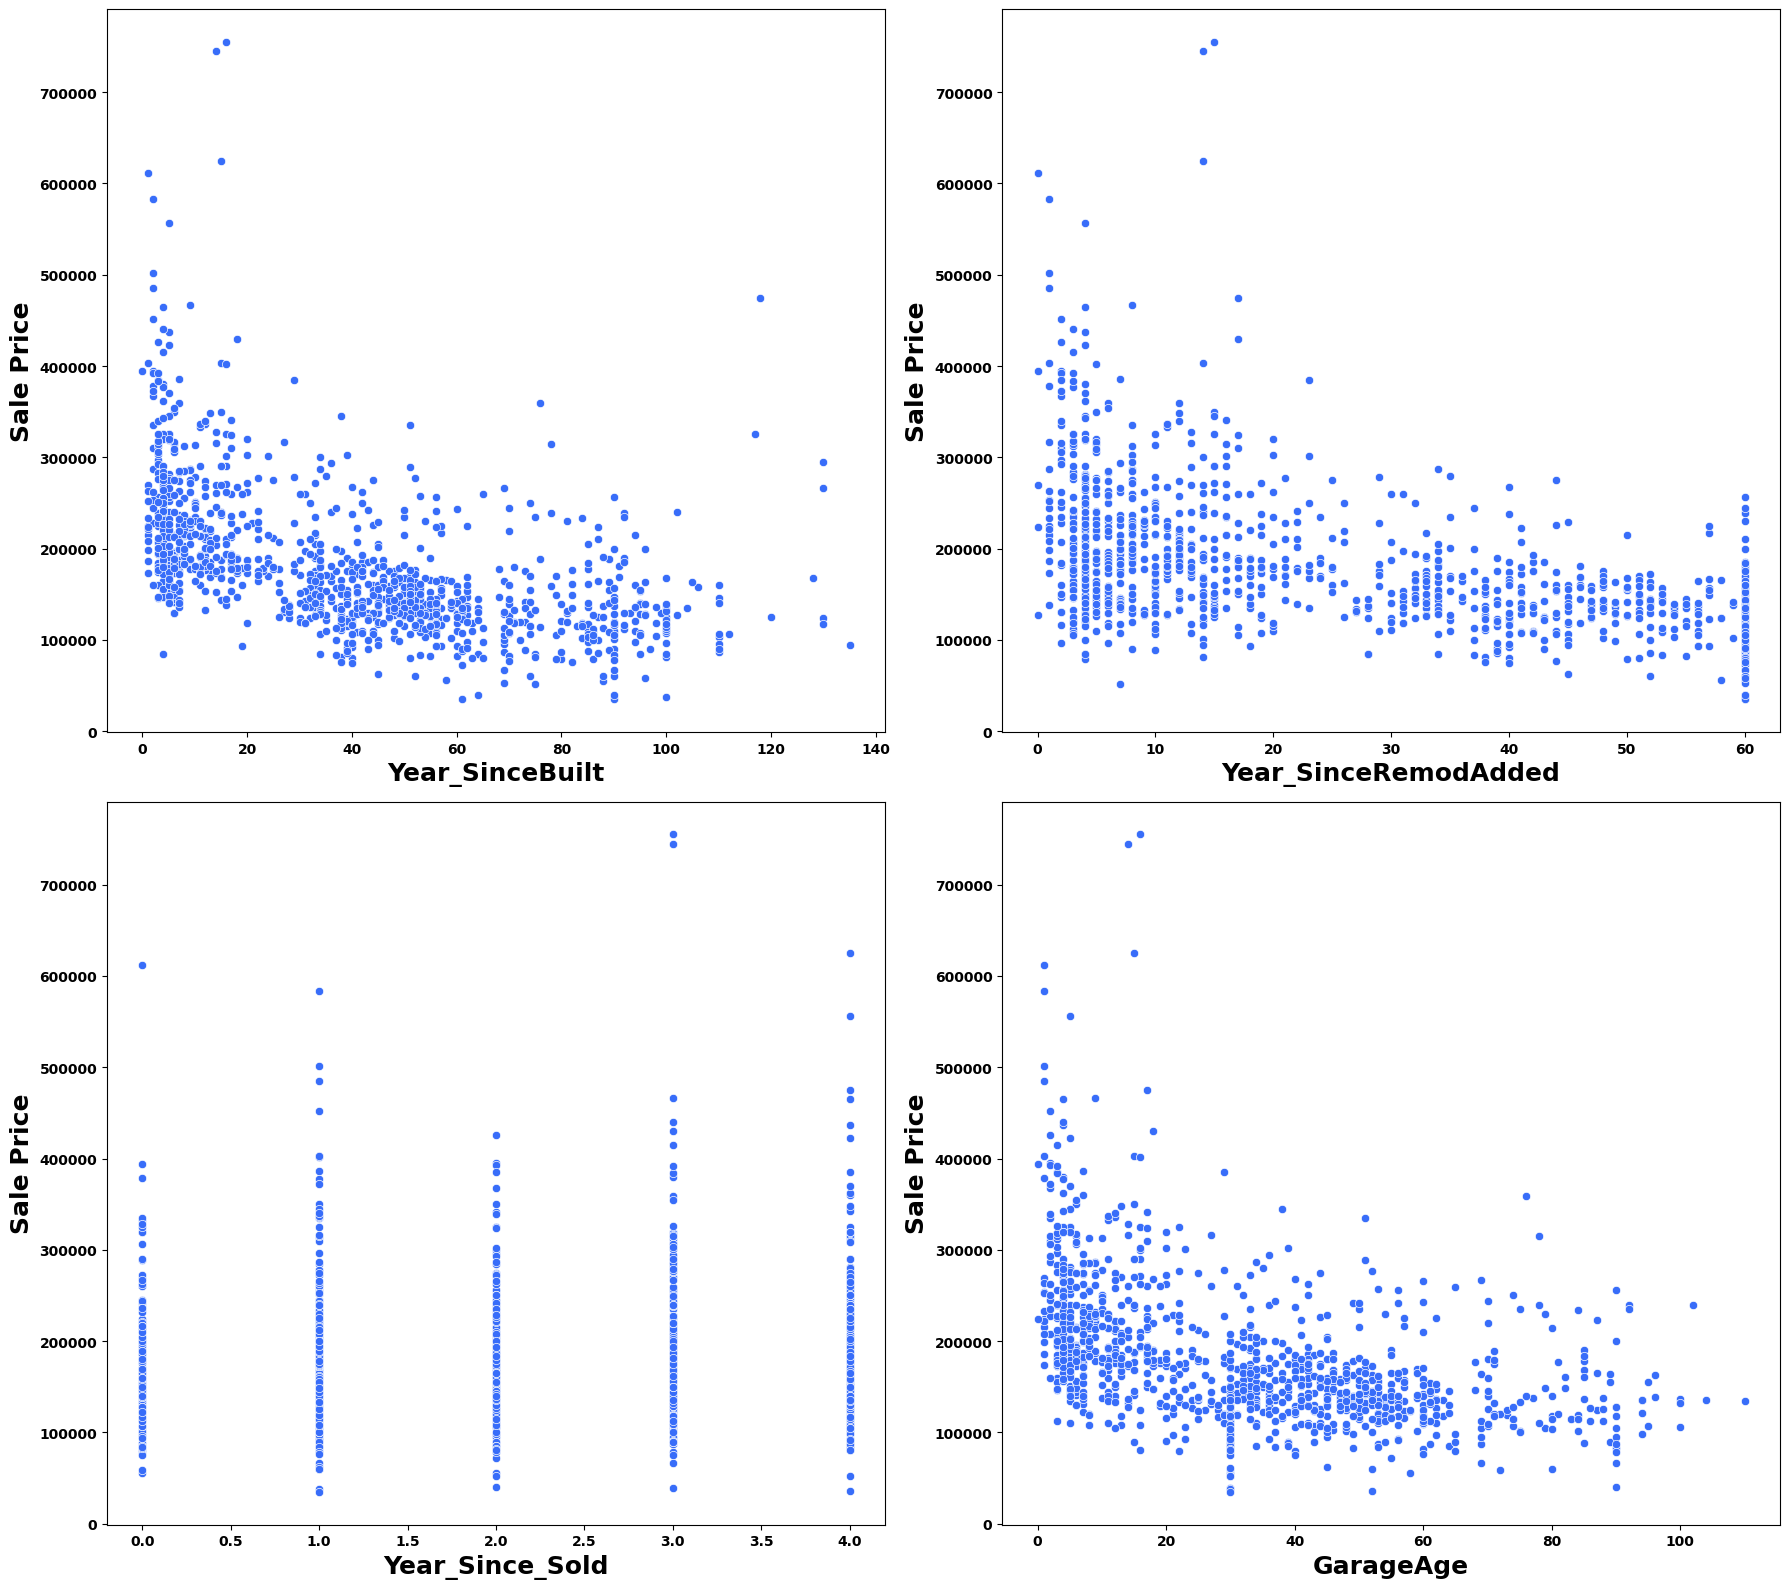

In [28]:
plt.figure(figsize=(18,16),facecolor='white')
a=1

for i in ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]:
    if a<=4:
        ax=plt.subplot(2,2,a)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    a+=1
plt.tight_layout()
plt.show()

#### Observation :-

1. We can see that as Property get older with time its sale Price get depricates.

2. 20 years after Remodelling Price of properties start decreases.

3. Older the garage age less the price of Property.

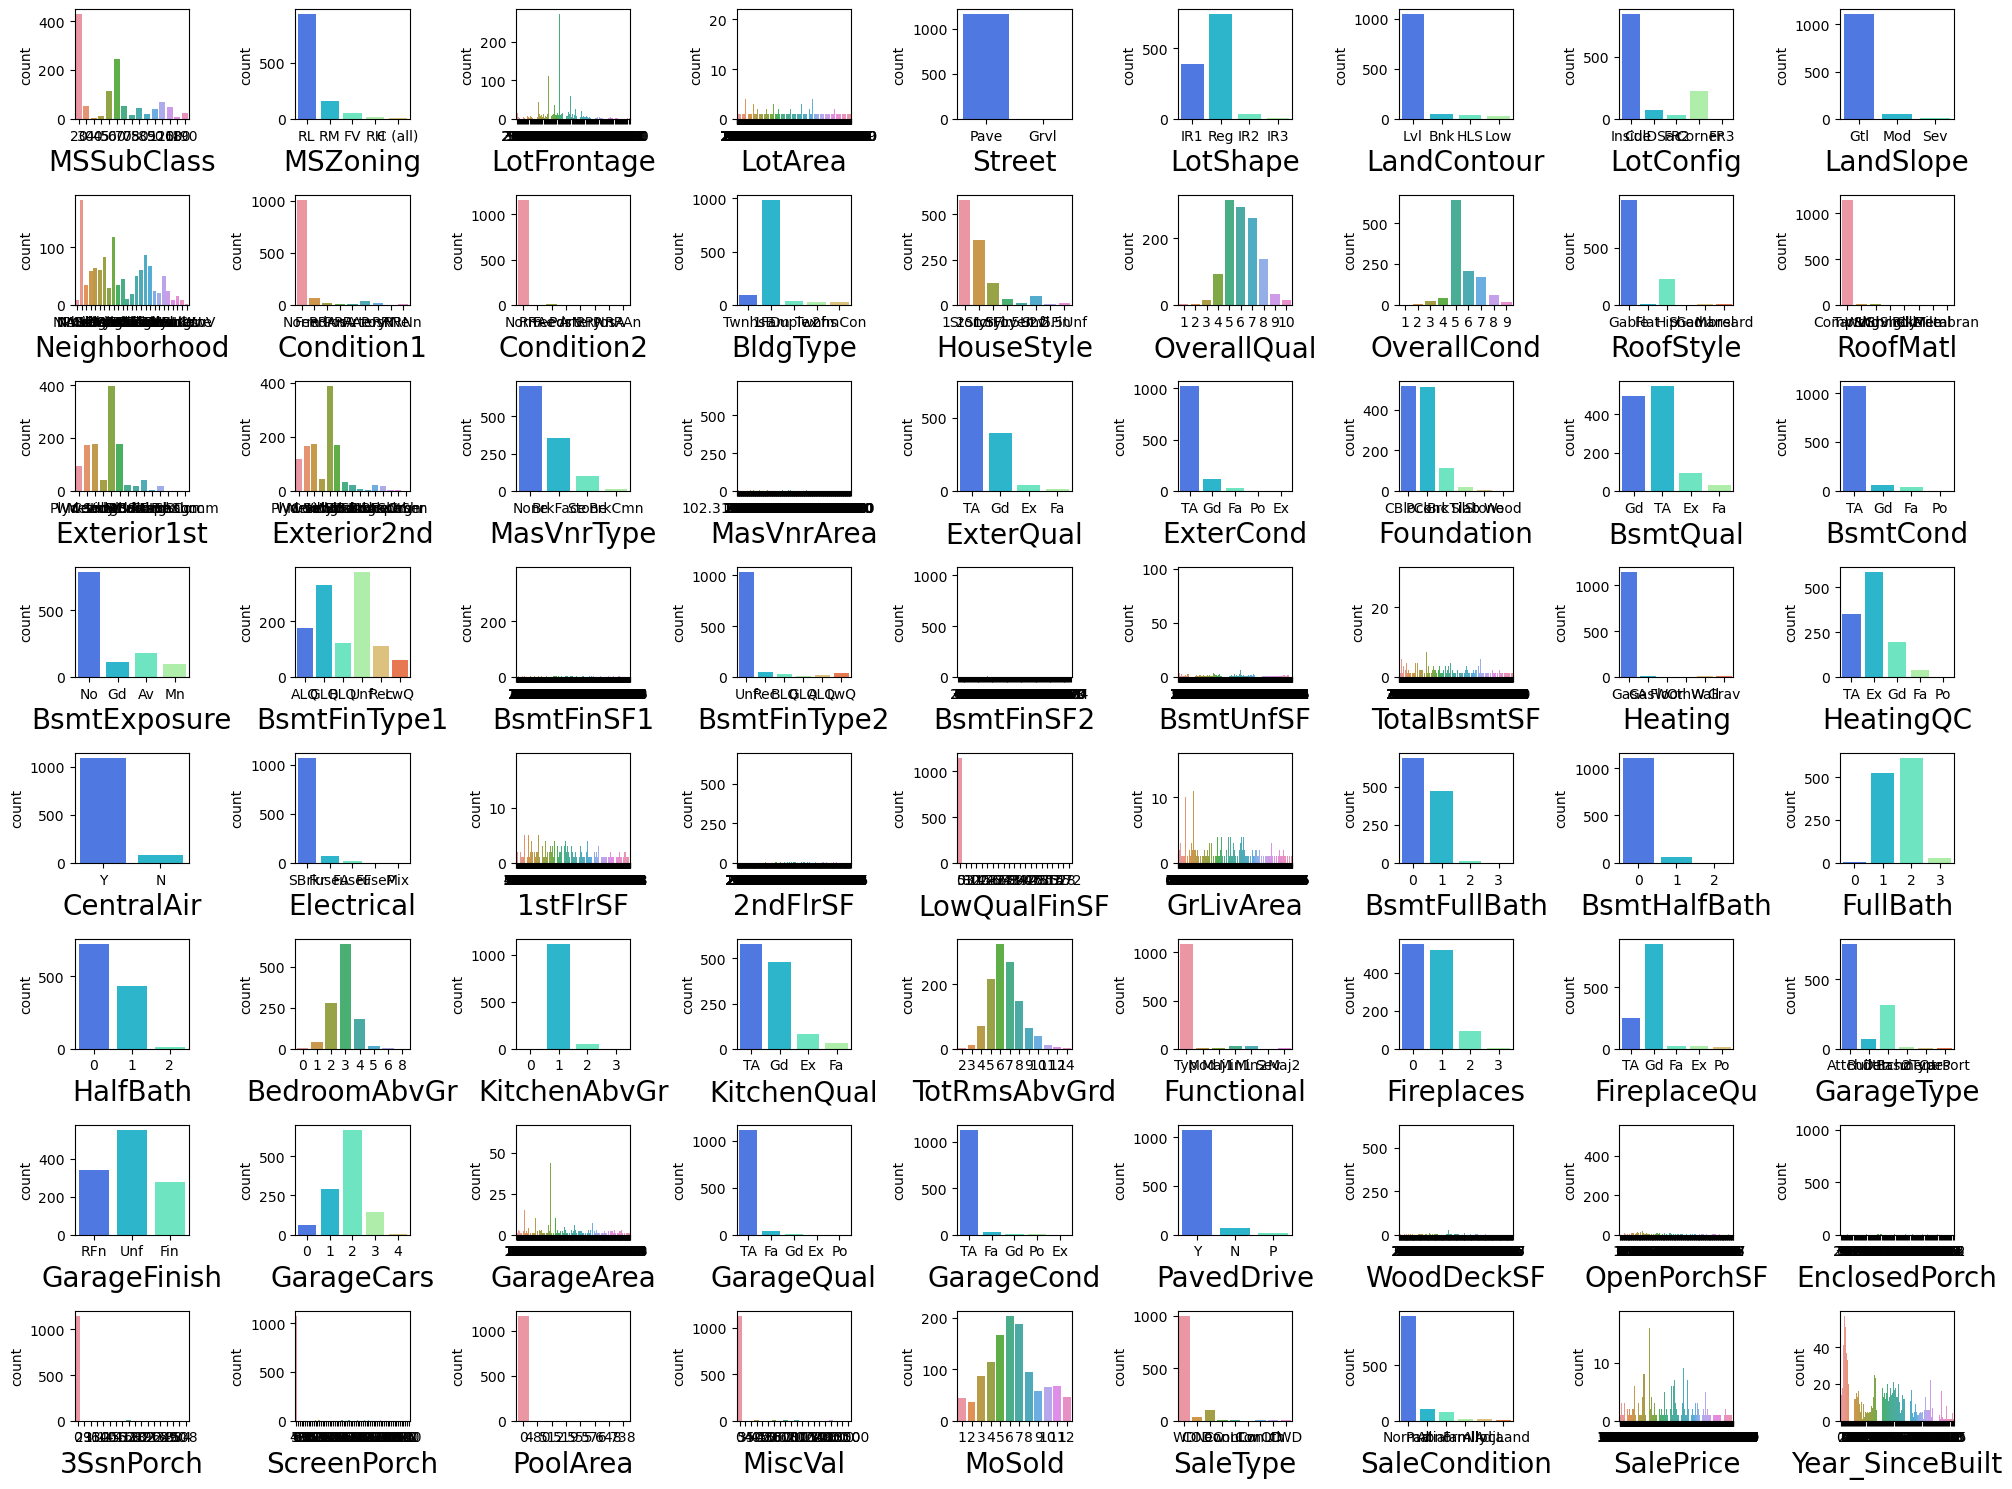

In [29]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 72:
        ax = plt.subplot(8,9,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()


##  Encoding Categorical Features

In [30]:
Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','FireplaceQu']

In [31]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3         70.0     4928       1         0            3   
1          20         3         95.0    15865       1         0            3   
2          60         3         92.0     9920       1         0            3   
3          20         3        105.0    11751       1         0            3   
4          20         3         70.0    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          4          1            12           2           2         0   
2          1          0            15           2           2         0   
3          4          0            14           2           2         0   
4          2          0            14           2           2         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            6            5          1         1            8   
1           2            8            6          0         5           12   
2           5            7            5          1         1            7   
3           2            6            6          3         1            8   
4           2            6            7          1         1            4   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            9           2         0.0          3          4           1   
1           13           2         0.0          2          2           2   
2            7           2         0.0          2          4           2   
3            9           1       480.0          3          4           1   
4            4           3       126.0          2          4           1   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         2         3             3             0         120             5   
1         3         1             1             0         351             4   
2         2         3             0             2         862             5   
3         2         3             3             1         705             5   
4         2         3             3             0        1246             5   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           0        958         1078        1          4           1   
1         823       1043         2217        1          0           1   
2           0        255         1117        1          0           1   
3           0       1139         1844        1          0           1   
4           0        356         1602        1          2           1   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           4       958         0             0        958             0   
1           4      2217         0             0       2217             1   
2           4      1127       886             0       2013             1   
3           4      1844         0             0       1844             0   
4           4      1602         0             0       1602             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         0             2             1            3   
1             0         2         0             4             1            2   
2             0         2         1             3             1            3   
3             0         2         0             3             1            3   
4             1         2         0             3             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0             5           6           1            4           1   
1             8           6           1            4           1   
2             8           6           1            4           1   
3             7           6

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1168 non-null   int64  
 1   MSZoning              1168 non-null   int32  
 2   LotFrontage           1168 non-null   float64
 3   LotArea               1168 non-null   int64  
 4   Street                1168 non-null   int32  
 5   LotShape              1168 non-null   int32  
 6   LandContour           1168 non-null   int32  
 7   LotConfig             1168 non-null   int32  
 8   LandSlope             1168 non-null   int32  
 9   Neighborhood          1168 non-null   int32  
 10  Condition1            1168 non-null   int32  
 11  Condition2            1168 non-null   int32  
 12  BldgType              1168 non-null   int32  
 13  HouseStyle            1168 non-null   int32  
 14  OverallQual           1168 non-null   int64  
 15  OverallCond          

No columns with object datatype present.

## Checking for Correlation.

<AxesSubplot:>

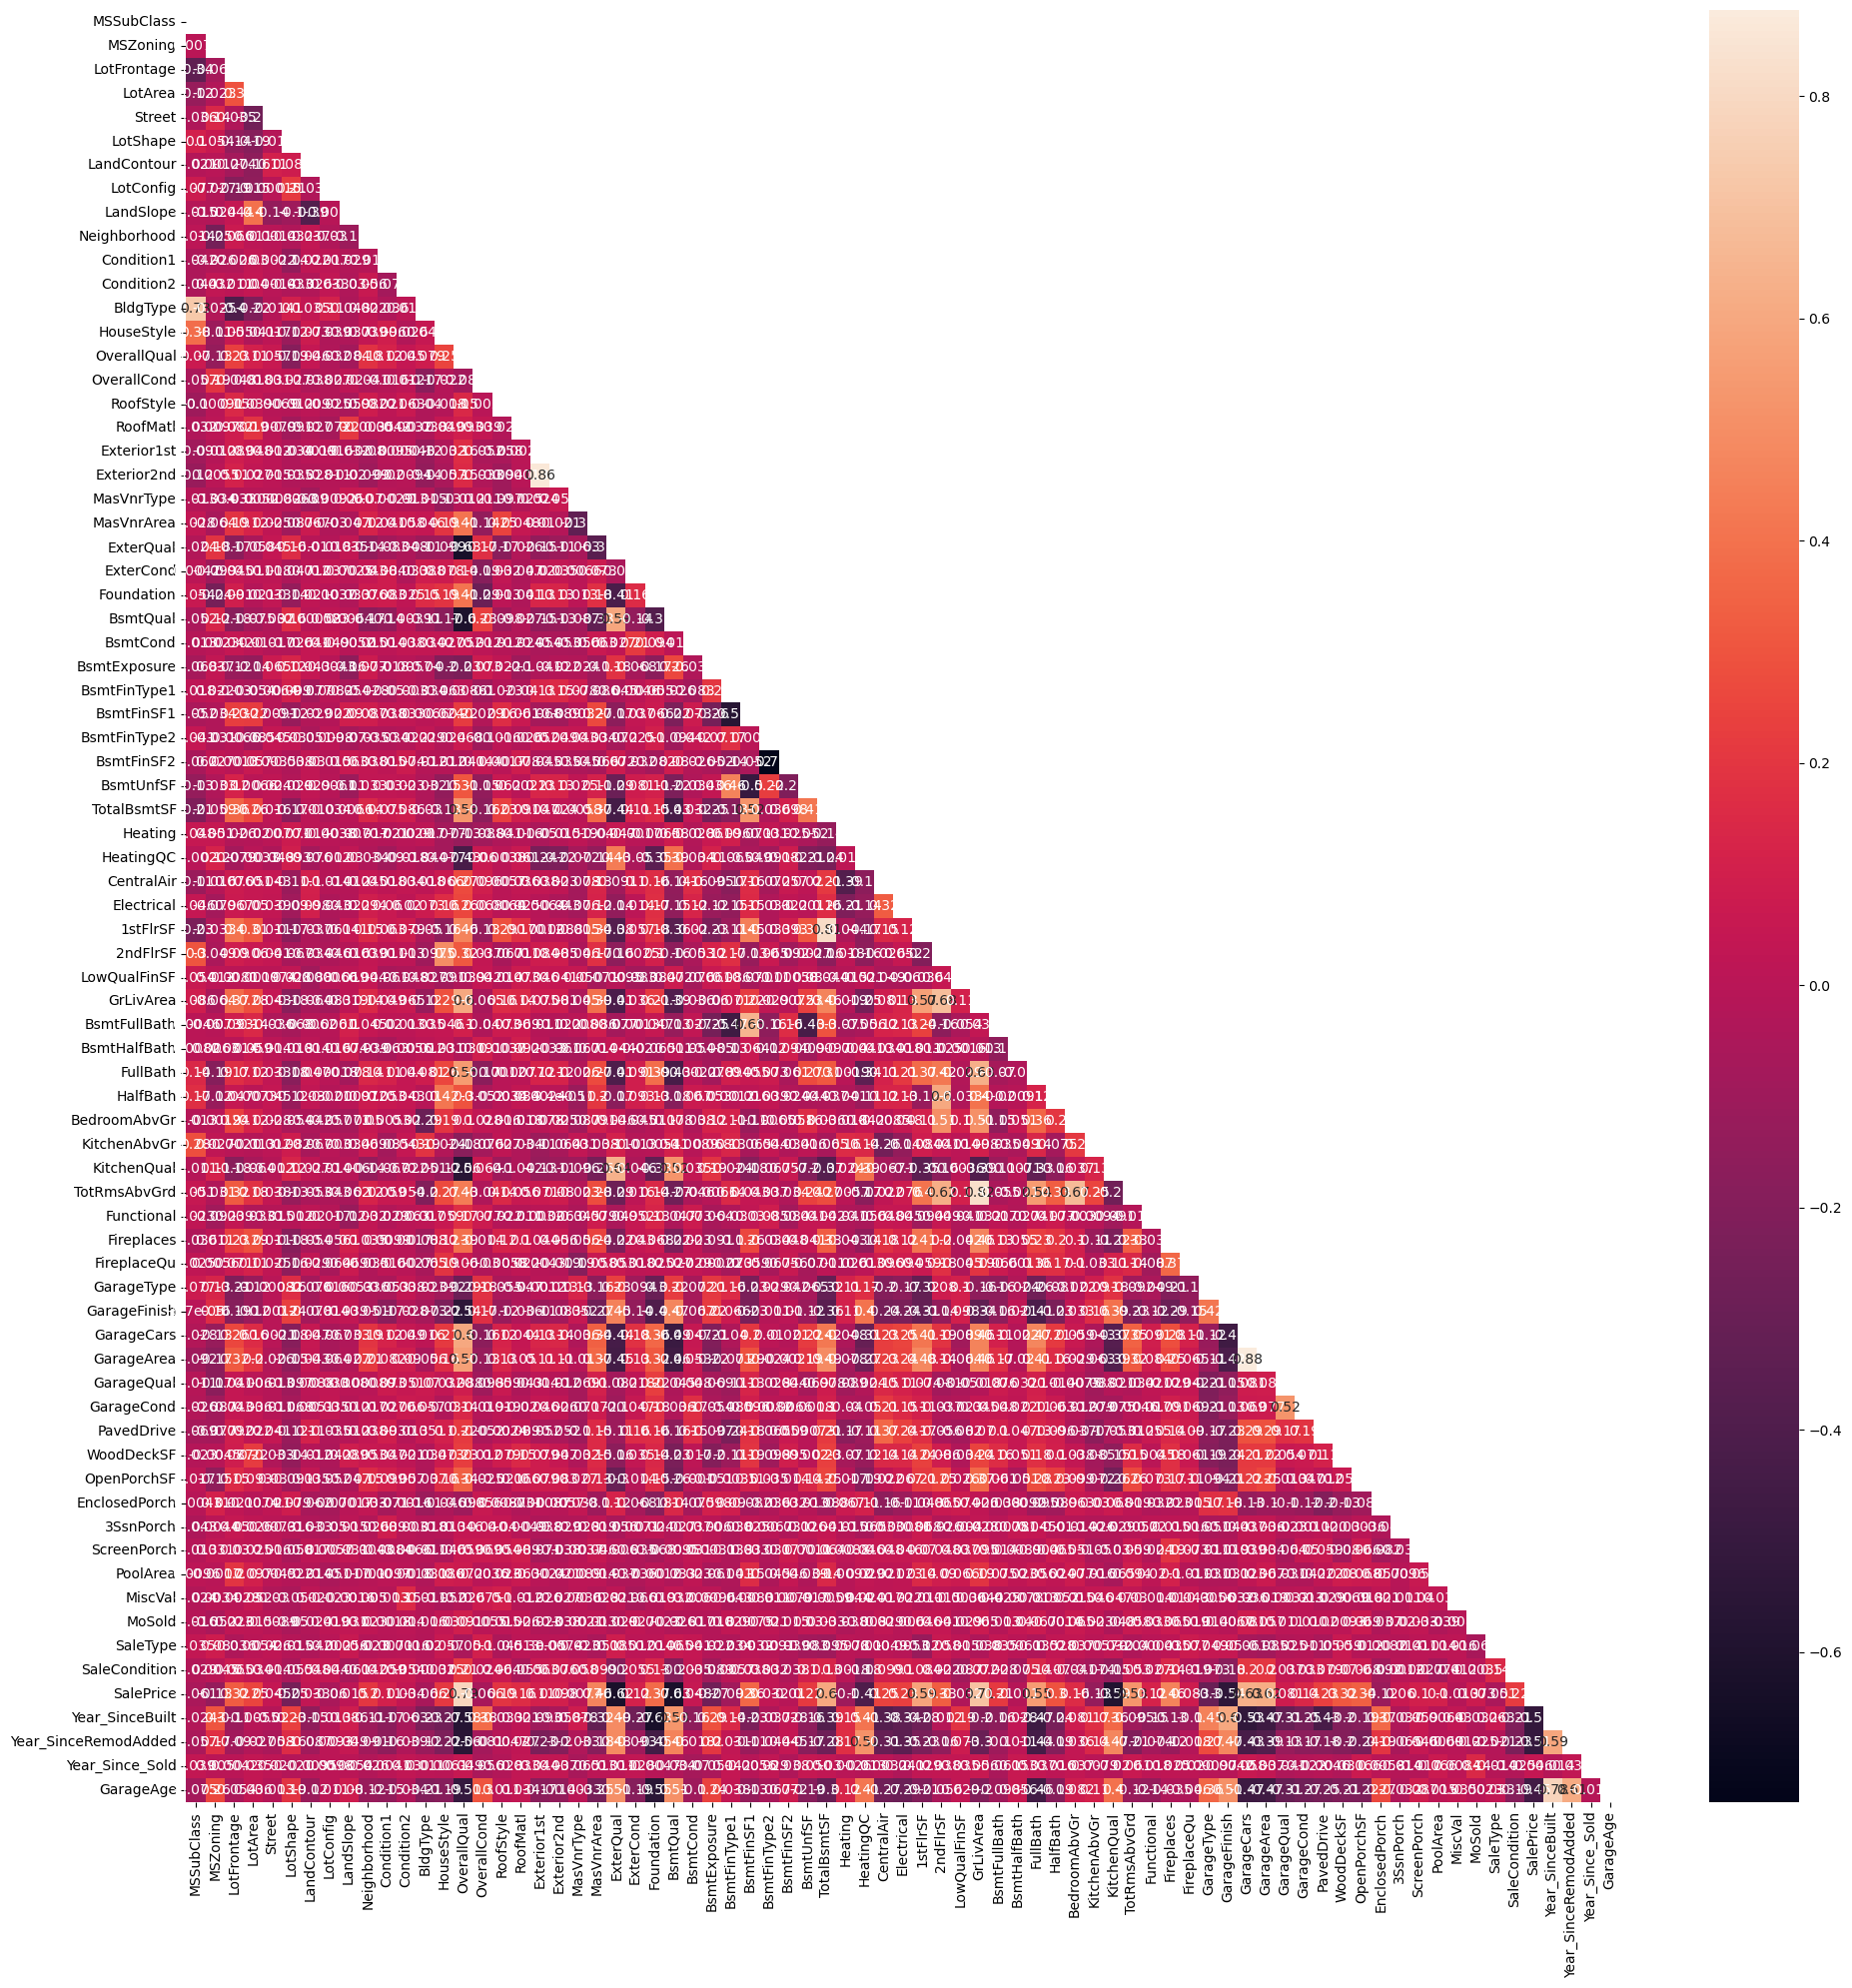

In [33]:
plt.figure(figsize = (20,20))
corr=df.corr()
sns.heatmap(corr,annot = True,fmt = '.2g',mask=np.triu(np.ones_like(corr)))

### Dropping the columns whose correlation is more than 80%.

In [34]:
# To find index values where correlation is more than 0.8
corr.replace(1,0,inplace=True)
hh=corr.applymap(lambda x: x>0.8).to_numpy()
hh
indices = np.argwhere(hh) 
indices

array([[18, 19],
       [19, 18],
       [33, 38],
       [38, 33],
       [41, 49],
       [49, 41],
       [55, 56],
       [56, 55]], dtype=int64)

In [35]:
for i in indices:
    print(corr.iloc[0,i])

Exterior1st   -0.090178
Exterior2nd   -0.120022
Name: MSSubClass, dtype: float64
Exterior2nd   -0.120022
Exterior1st   -0.090178
Name: MSSubClass, dtype: float64
TotalBsmtSF   -0.214042
1stFlrSF      -0.227927
Name: MSSubClass, dtype: float64
1stFlrSF      -0.227927
TotalBsmtSF   -0.214042
Name: MSSubClass, dtype: float64
GrLivArea       0.086448
TotRmsAbvGrd    0.051179
Name: MSSubClass, dtype: float64
TotRmsAbvGrd    0.051179
GrLivArea       0.086448
Name: MSSubClass, dtype: float64
GarageCars   -0.027639
GarageArea   -0.092408
Name: MSSubClass, dtype: float64
GarageArea   -0.092408
GarageCars   -0.027639
Name: MSSubClass, dtype: float64


From the above list we can conclude that the foloowing columns have correlation is more than 80%.


1. GarageArea and GarageCars
2. TotRmsAbvGrd and GrLivArea 
3. 1stFlrSF and TotalBsmtSF
4. Exterior2nd and Exterior1st

In [36]:
df.drop(columns = ['TotRmsAbvGrd','GarageArea','TotalBsmtSF','Exterior2nd'],axis = 1, inplace = True)

## Outlier treatment

Before the outlier treatment we must remove the columns with string values which have no significance in the output.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1168 non-null   int64  
 1   MSZoning              1168 non-null   int32  
 2   LotFrontage           1168 non-null   float64
 3   LotArea               1168 non-null   int64  
 4   Street                1168 non-null   int32  
 5   LotShape              1168 non-null   int32  
 6   LandContour           1168 non-null   int32  
 7   LotConfig             1168 non-null   int32  
 8   LandSlope             1168 non-null   int32  
 9   Neighborhood          1168 non-null   int32  
 10  Condition1            1168 non-null   int32  
 11  Condition2            1168 non-null   int32  
 12  BldgType              1168 non-null   int32  
 13  HouseStyle            1168 non-null   int32  
 14  OverallQual           1168 non-null   int64  
 15  OverallCond          

All coulmns have int and float datatypes.

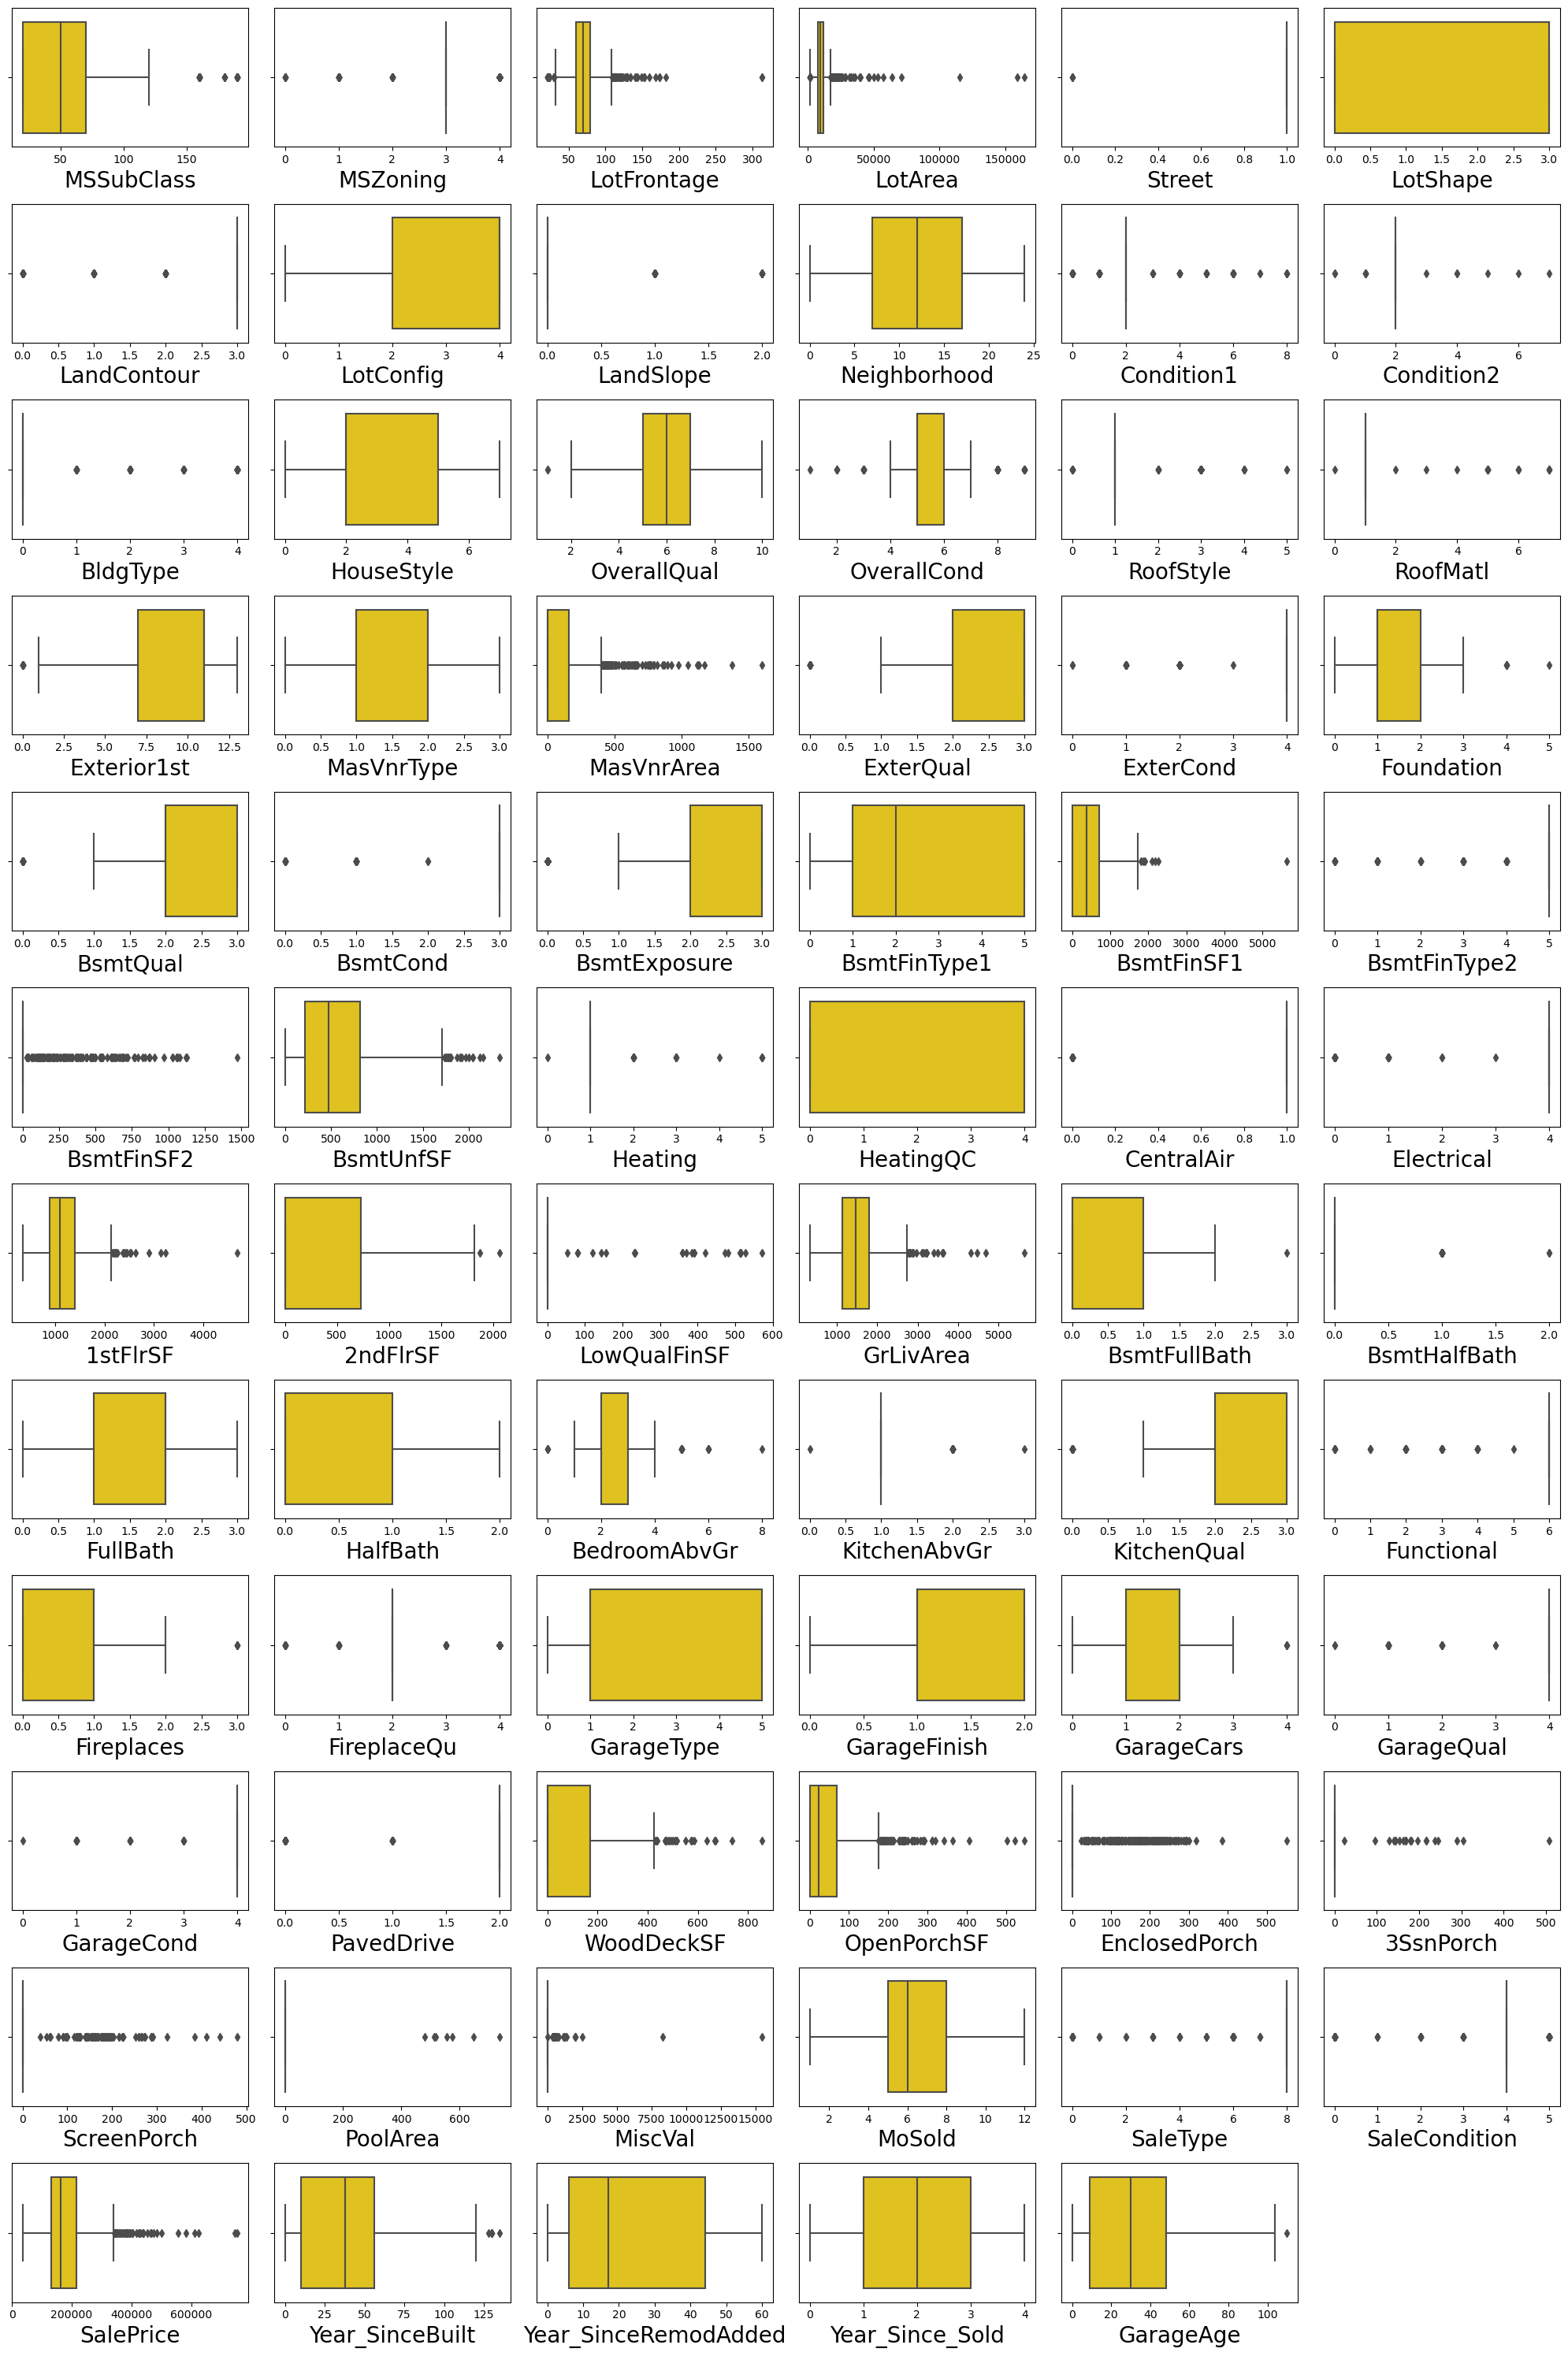

In [38]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=72:
        ax=plt.subplot(12,6,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [39]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]

# Model Building.

## Standard Scaling

In [40]:
# Splitting data in target and dependent feature
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [41]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [43]:
train_x, test_x, train_y, test_y = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', train_x.shape)
print('Training Target Vector Size :', train_y.shape)
print('Test Feature Matrix Size:', test_x.shape)
print('Test Target Vector Size:', test_y.shape)

Training Feature Matrix Size: (817, 70)
Training Target Vector Size : (817,)
Test Feature Matrix Size: (351, 70)
Test Target Vector Size: (351,)


## Finding the best model

In [44]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 21170.39666608148
Mean Squared Error: 858383692.5971951
Root Mean Squared Error: 29298.185824333817
R squared score:  0.8596665675880402
Cross Validation Score is : [0.84275928 0.67878349 0.46247683 0.78869014 0.6728491 ]
Mean Score : 0.6891117685109865
Difference : -0.17055479907705362


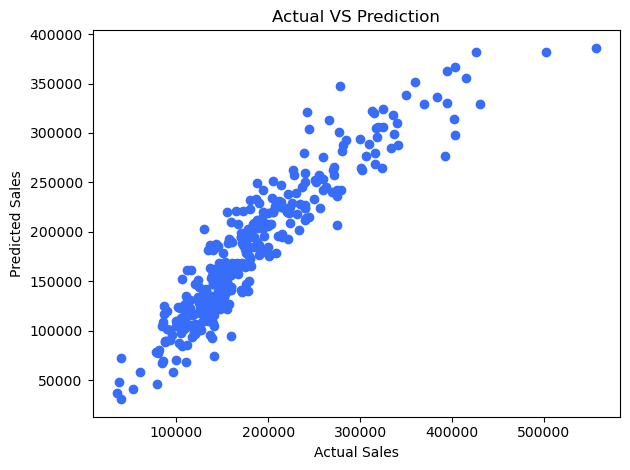



Scores for Lasso() are
Mean Absolute Error: 21168.395205360266
Mean Squared Error: 858289486.581479
Root Mean Squared Error: 29296.578069485844
R squared score:  0.8596819689215618
Cross Validation Score is : [0.84285582 0.67879124 0.46279577 0.78870934 0.67385926]
Mean Score : 0.6894022864677135
Difference : -0.17027968245384828


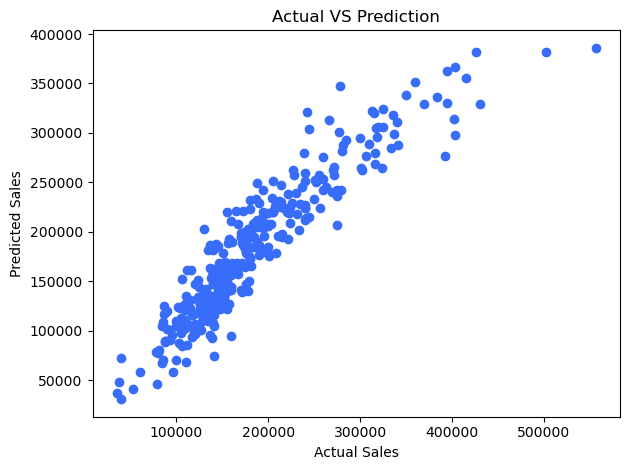



Scores for SVR() are
Mean Absolute Error: 56245.852821355744
Mean Squared Error: 6465090730.931606
Root Mean Squared Error: 80405.78791935073
R squared score:  -0.056949684565039016
Cross Validation Score is : [-0.05457259 -0.05994692 -0.02257844 -0.05773039 -0.04230516]
Mean Score : -0.04742669853437089
Difference : 0.009522986030668125


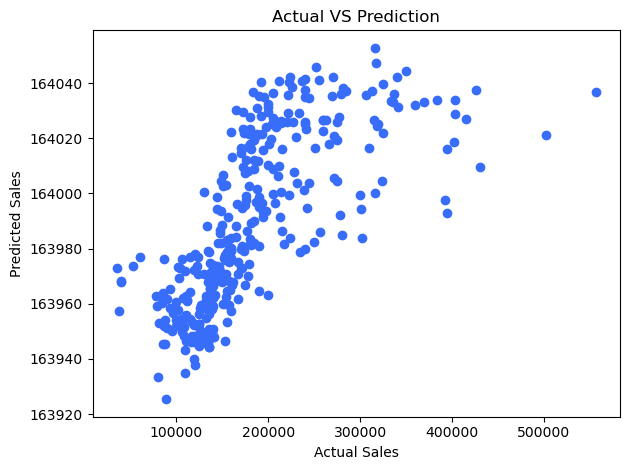



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 28722.390313390315
Mean Squared Error: 1754425529.974359
Root Mean Squared Error: 41885.86312796191
R squared score:  0.7131765681760132
Cross Validation Score is : [0.70603413 0.68612206 0.77645277 0.64930986 0.6233076 ]
Mean Score : 0.6882452832659839
Difference : -0.024931284910029272


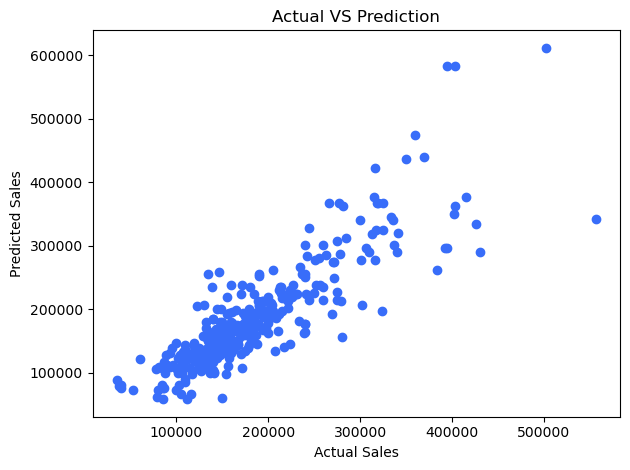



Scores for RandomForestRegressor() are
Mean Absolute Error: 17381.24358974359
Mean Squared Error: 653870812.5890375
Root Mean Squared Error: 25570.897766582963
R squared score:  0.8931014926355594
Cross Validation Score is : [0.88497492 0.82282216 0.76144476 0.83801195 0.7759498 ]
Mean Score : 0.8166407181087424
Difference : -0.07646077452681699


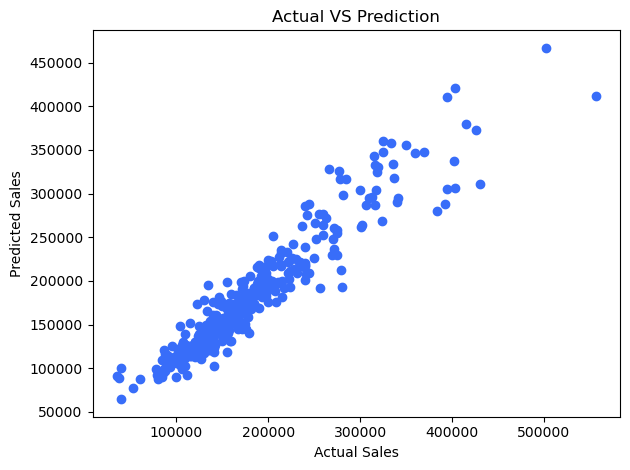

In [45]:
model=[lr,lasso,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

Random forest regressor has given the best result with R2 score= 0.8962927546604891 and mean CV Score = 0.8213496578533995 so we will proceed with that.

## Hyperparameter Tuning.

In [46]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
param = {'n_estimators':range(0,100,10),
         'criterion':['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
         'random_state':range(1,10),
         'max_features':['auto', 'sqrt']}

In [48]:
grid = GridSearchCV(rfr,param_grid = param)
grid.fit(train_x,train_y)
grid.best_params_

{'criterion': 'absolute_error',
 'max_features': 'sqrt',
 'n_estimators': 70,
 'random_state': 2}

In [52]:
rfr_hyp=RandomForestRegressor(n_estimators= 70 ,criterion='absolute_error', random_state= 2, max_features= 'sqrt')

Scores for RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=70, random_state=2) are
Mean Absolute Error: 18035.69641839642
Mean Squared Error: 729711345.5527548
Root Mean Squared Error: 27013.16985384638
R squared score:  0.8807026523517364
Cross Validation Score is : [0.90310692 0.83471074 0.79509746 0.84475042 0.79309378]
Mean Score : 0.8341518638572382
Difference : -0.04655078849449823


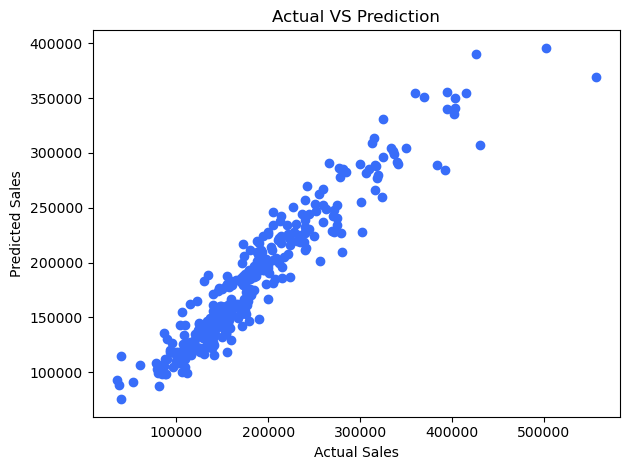

In [53]:
rfr_hyp.fit(train_x,train_y)
rfr_hyp.score(train_x,train_y)
predm=rfr_hyp.predict(test_x)
print(f"Scores for {rfr_hyp} are")
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
print('R squared score: ', r2_score(test_y, predm))
score=cross_val_score(rfr_hyp,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())
print("Difference :",score.mean()-r2_score(test_y, predm))
plt.scatter(test_y, predm)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual VS Prediction")
plt.show()

In [73]:
import joblib
joblib.dump(rfr_hyp,"House_rfr.obj")

['House_rfr.obj']

## Testing Dataset.

In [82]:
df_test = pd.read_csv('test.csv')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

Tweaking the test dataset according to train dataset so that it can fit the model.

In [83]:
df_test.drop(columns = ['MiscFeature','PoolQC','Alley','Fence'],axis = 1, inplace = True)

In [84]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [85]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [86]:
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())

for x in ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Electrical']:
    df_test[x] = df_test[x].fillna(df_test[x].mode()[0])

In [87]:
df_test.drop('Utilities',axis = 1, inplace = True )

In [88]:
df_test.drop('Id',axis = 1, inplace = True )

In [89]:
for i in Categorical_features:
    df_test[i] = le.fit_transform(df_test[i])
df_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249             5           0        673         1922        0   
1        1036             5           0        184         1220        0   
2           0             5           0       1753         1753        0   
3         275             5           0        429          704        0   
4           0             5           0        894          894        0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           3      1922         0             0   
1          2           1           3      1360         0             0   
2          0           1           3      1788         0             0   
3          0           1           3       860       704             0   
4          0           1           3       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1   

In [90]:
df_test.drop(['TotRmsAbvGrd','GarageArea','TotalBsmtSF','Exterior2nd'],axis = 1, inplace = True )

In [91]:
# Converting years column to age column
df_test['Year_SinceBuilt'] = df_test['YearBuilt'].max() - df_test['YearBuilt']
df_test['Year_SinceRemodAdded'] = df_test['YearRemodAdd'].max() - df_test['YearRemodAdd']
df_test['Year_Since'] = df_test['YrSold'].max() - df_test['YrSold']
df_test['GarageAge'] = df_test['GarageYrBlt'].max() - df_test['GarageYrBlt']

# Dropping old columns in train dataset
df_test.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

df_test.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [92]:
scaler= StandardScaler()
test_scale = scaler.fit_transform(df_test)

In [93]:
rfr_l=joblib.load('House_rfr.obj')
result=rfr_l.predict(test_scale)

In [95]:
a = []
for i in result:
    a.append(i)
    
test = pd.DataFrame({'TEST' : a})
test.head(50)

TEST
0   340827.000000
1   201178.171429
2   254390.157143
3   169962.642857
4   232818.200000
5    88799.914286
6   145027.600000
7   333986.571429
8   249452.342857
9   174377.457143
10   91075.357143
11  148065.828571
12  117613.171429
13  173355.342857
14  319580.800000
15  117492.842857
16  121247.614286
17  128101.285714
18  174252.142857
19  197245.000000
20  164709.357143
21  154522.857143
22  156738.571429
23  118733.942857
24  110918.800000
25  129848.000000
26  180258.571429
27  141585.714286
28  174200.400000
29  110169.971429
30  146726.942857
31  199810.071429
32  227653.885714
33  156612.857143
34  118010.000000
35  184081.328571
36  202249.871429
37  124710.714286
38  164237.428571
39  147087.485714
40  106301.757143
41  301790.828571
42  207468.457143
43  195457.900000
44  145391.114286
45  126419.471429
46  125204.685714
47  108230.714286
48  214357.414286
49  340613.971429